## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
from keras.layers import Dropout

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.9,0.75,0.25,0.1]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def plotLoss(ax,train_loss,valid_loss,label):
    ax.plot(range(len(train_loss)), train_loss,"-", label="train loss {}".format(label))
    ax.plot(range(len(valid_loss)), valid_loss,"--", label="valid loss {}".format(label))
    ax.set_title("Loss")
    ax.legend()
    #plt.show()

def plotAccuracy(ax,train_acc,valid_acc,label):
    ax.plot(range(len(train_acc)), train_acc,"-", label="train accuracy {}".format(label))
    ax.plot(range(len(valid_acc)), valid_acc,"--", label="valid accuracy {}".format(label))    
    ax.set_title("Accuracy")
    ax.legend()
    #plt.show()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________

50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0963 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026

50000/50000 [==============================] - 3s 60us/step - loss: 1.5496 - accuracy: 0.4434 - val_loss: 1.4783 - val_accuracy: 0.4731
Epoch 37/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5515 - accuracy: 0.4407 - val_loss: 1.4979 - val_accuracy: 0.4698
Epoch 38/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5422 - accuracy: 0.4431 - val_loss: 1.4653 - val_accuracy: 0.4773
Epoch 39/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5311 - accuracy: 0.4489 - val_loss: 1.4980 - val_accuracy: 0.4670
Epoch 40/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5353 - accuracy: 0.4464 - val_loss: 1.4903 - val_accuracy: 0.4726
Epoch 41/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5266 - accuracy: 0.4493 - val_loss: 1.4982 - val_accuracy: 0.4633
Epoch 42/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5345 - accuracy: 0.4464 - val_loss: 1.4613

50000/50000 [==============================] - 3s 62us/step - loss: 1.2569 - accuracy: 0.5465 - val_loss: 1.3449 - val_accuracy: 0.5267
Epoch 32/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.2490 - accuracy: 0.5520 - val_loss: 1.3466 - val_accuracy: 0.5235
Epoch 33/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2468 - accuracy: 0.5516 - val_loss: 1.3326 - val_accuracy: 0.5283
Epoch 34/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2370 - accuracy: 0.5541 - val_loss: 1.3574 - val_accuracy: 0.5178
Epoch 35/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.2330 - accuracy: 0.5558 - val_loss: 1.3567 - val_accuracy: 0.5188
Epoch 36/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.2267 - accuracy: 0.5606 - val_loss: 1.3507 - val_accuracy: 0.5183
Epoch 37/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2197 - accuracy: 0.5598 - val_loss: 1.3436

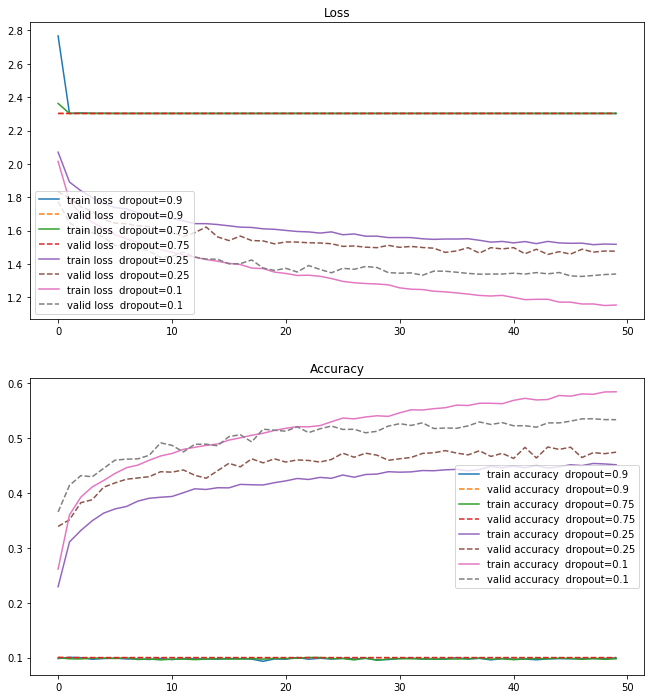

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(11,12))

for dpo in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dpo)
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    optimizer  = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    plotLoss(ax1,train_loss,valid_loss," dropout={}".format(dpo))
    plotAccuracy(ax2,train_acc,valid_acc," dropout={}".format(dpo))



Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0   

Epoch 43/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0978 - val_

Epoch 35/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3026 - accuracy: 0.0993 - val_

Epoch 27/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6416 - accuracy: 0.4099 - val_loss: 1.5969 - val_accuracy: 0.4441
Epoch 28/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6394 - accuracy: 0.4134 - val_loss: 1.6000 - val_accuracy: 0.4376
Epoch 29/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6261 - accuracy: 0.4167 - val_loss: 1.5792 - val_accuracy: 0.4412
Epoch 30/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6271 - accuracy: 0.4195 - val_loss: 1.5631 - val_accuracy: 0.4490
Epoch 31/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6309 - accuracy: 0.4130 - val_loss: 1.6066 - val_accuracy: 0.4275
Epoch 32/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6256 - accuracy: 0.4169 - val_loss: 1.5486 - val_accuracy: 0.4557
Epoch 33/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6158 - accuracy: 0.4193 - val_

Epoch 19/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3930 - accuracy: 0.5005 - val_loss: 1.3931 - val_accuracy: 0.5072
Epoch 20/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3886 - accuracy: 0.5029 - val_loss: 1.4435 - val_accuracy: 0.4877
Epoch 21/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3668 - accuracy: 0.5092 - val_loss: 1.3871 - val_accuracy: 0.5084
Epoch 22/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3610 - accuracy: 0.5121 - val_loss: 1.3923 - val_accuracy: 0.5000
Epoch 23/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3472 - accuracy: 0.5180 - val_loss: 1.3988 - val_accuracy: 0.5019
Epoch 24/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3450 - accuracy: 0.5178 - val_loss: 1.3827 - val_accuracy: 0.5097
Epoch 25/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3395 - accuracy: 0.5188 - val_

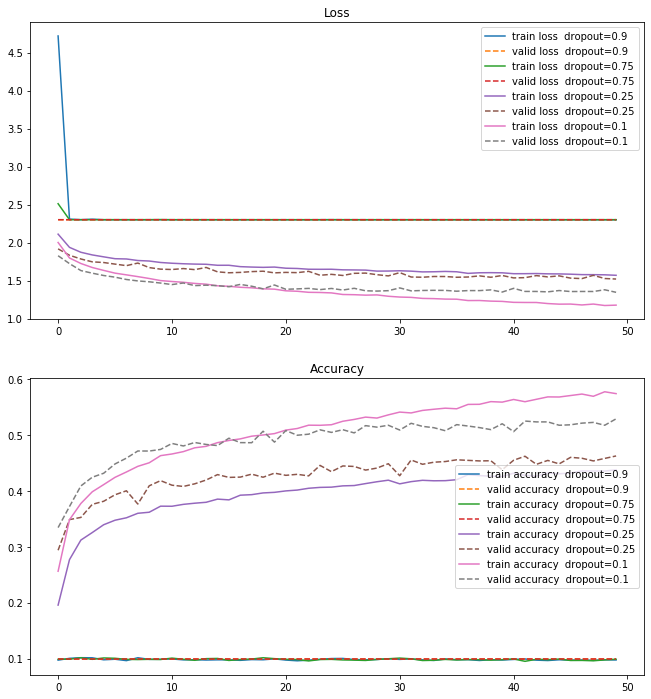

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(11,12))

for dpo in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:],num_neurons=[512, 256,256,256, 128], drp_ratio=dpo)
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    optimizer  = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    plotLoss(ax1,train_loss,valid_loss," dropout={}".format(dpo))
    plotAccuracy(ax2,train_acc,valid_acc," dropout={}".format(dpo))

